# Perkenalan

Nama : Pramudya Adi Nugraha

Batch : 10

Dataset : Telco Customer Churn Dataset

Objective :
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

# Import Libraries

In [1]:
!pip install feature-engine

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder ,StandardScaler, OrdinalEncoder
from feature_engine.imputation import MeanMedianImputer
from sklearn.metrics import classification_report
from statsmodels.tools.eval_measures import mse
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Dropout
from keras import Model, Sequential
from keras.models import load_model
import warnings


# Data Loading

In [3]:
# Load dataset

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Duplicate dataset

data_copy = data.copy()

In [5]:
# Check dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check dataset column

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Check dataset statistic

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


There is an oddity, because from the dataset we can see that there is a `TotalCharges` column, but that column is not included in the numeric column statistics

In [8]:
data_num_col = data.select_dtypes(include= np.number).columns.tolist()
data_cat_col = data.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', data_num_col)
print('Kolom bertype catagorical pada dataset :', data_cat_col)

Kolom bertype numeric pada dataset : ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Kolom bertype catagorical pada dataset : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [9]:
data[data_cat_col].describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


After checking, it is true that the `TotalCharges` column is included in the column with the object category, so it will be changed to numeric type data in order to simplify the next process.

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].shape

(7043,)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis (EDA)

In [12]:
# Check dataset shape

data.shape

(7043, 21)

In [13]:
# Looking if theres any missing value in dataset

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

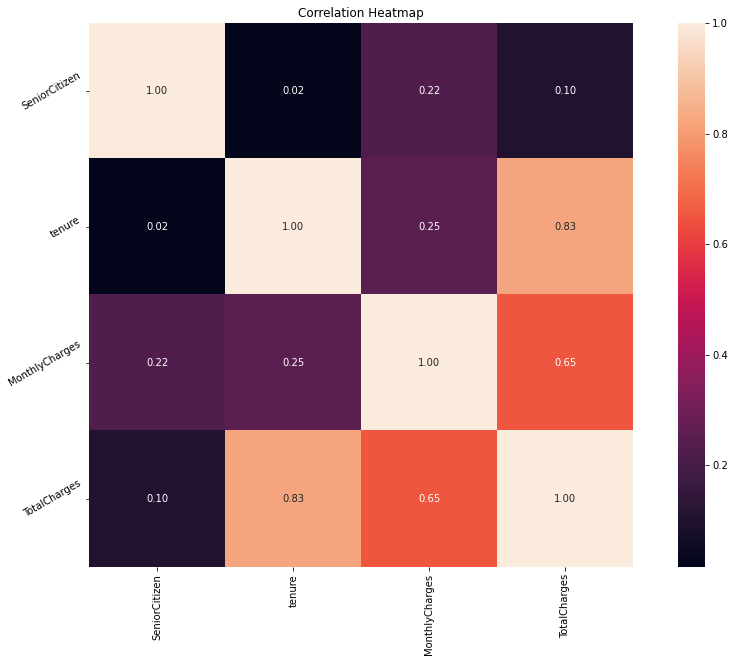

In [14]:
# Looking for corelation from each numerical column in dataset using heat map 

correlation = data.corr()

plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

# Data Preprocessing

In [15]:
# Dilakukan perubahan bentuk pada kolom `Churn` dari catagorical menjadi numerical

data['Churn'] = data['Churn'].map({'No' : 0,
                           'Yes' : 1})
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [16]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state= 18)
data_inf_clear = data_inf.dropna()
data_inf_clear

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3388,8498-XXGWA,Female,0,Yes,No,65,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.15,3673.15,0
4292,2091-RFFBA,Female,1,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.90,2217.15,1
6339,7623-TRNQN,Male,0,No,Yes,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.90,49.90,1
5332,4565-EVZMJ,Female,0,No,No,47,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,58.90,2813.05,0
3404,6693-DJWTY,Female,0,No,Yes,35,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,0
6023,4698-KVLLG,Female,1,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.90,0
24,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,0
4735,0723-FDLAY,Male,0,No,No,44,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),85.25,3704.15,0
4412,8042-RNLKO,Male,0,No,No,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.45,1699.15,0
134,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.35,81.25,1


In [17]:
# Remove Inference-Set from Dataset

data_new = data.drop(data_inf_clear.index)
data_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [18]:
# Reset Index

data_new.reset_index(drop=True, inplace=True)
data_inf_clear.reset_index(drop=True, inplace=True)
data_inf_clear

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8498-XXGWA,Female,0,Yes,No,65,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.15,3673.15,0
1,2091-RFFBA,Female,1,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.90,2217.15,1
2,7623-TRNQN,Male,0,No,Yes,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.90,49.90,1
3,4565-EVZMJ,Female,0,No,No,47,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,58.90,2813.05,0
4,6693-DJWTY,Female,0,No,Yes,35,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,0
5,4698-KVLLG,Female,1,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.90,0
6,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,0
7,0723-FDLAY,Male,0,No,No,44,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),85.25,3704.15,0
8,8042-RNLKO,Male,0,No,No,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.45,1699.15,0
9,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.35,81.25,1


## Splitting Dataset

In [19]:
# Split between X (features) and y (target)

X = data_new.drop('Churn', axis=1)
y = data_new['Churn']
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7029,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7030,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7031,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [20]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7028    0
7029    0
7030    0
7031    1
7032    0
Name: Churn, Length: 7033, dtype: int64

In [21]:
# Split between Train-Set and Test-Set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (5626, 20)
X Test Size  :  (1407, 20)
y Train Size :  (5626,)
y Test Size  :  (1407,)


In [22]:
# Split between Train-Set and Val-Set


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=18)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_val.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_val.shape)

X Train Size :  (5063, 20)
X Test Size  :  (563, 20)
y Train Size :  (5063,)
y Test Size  :  (563,)


---
## Handling Outlier

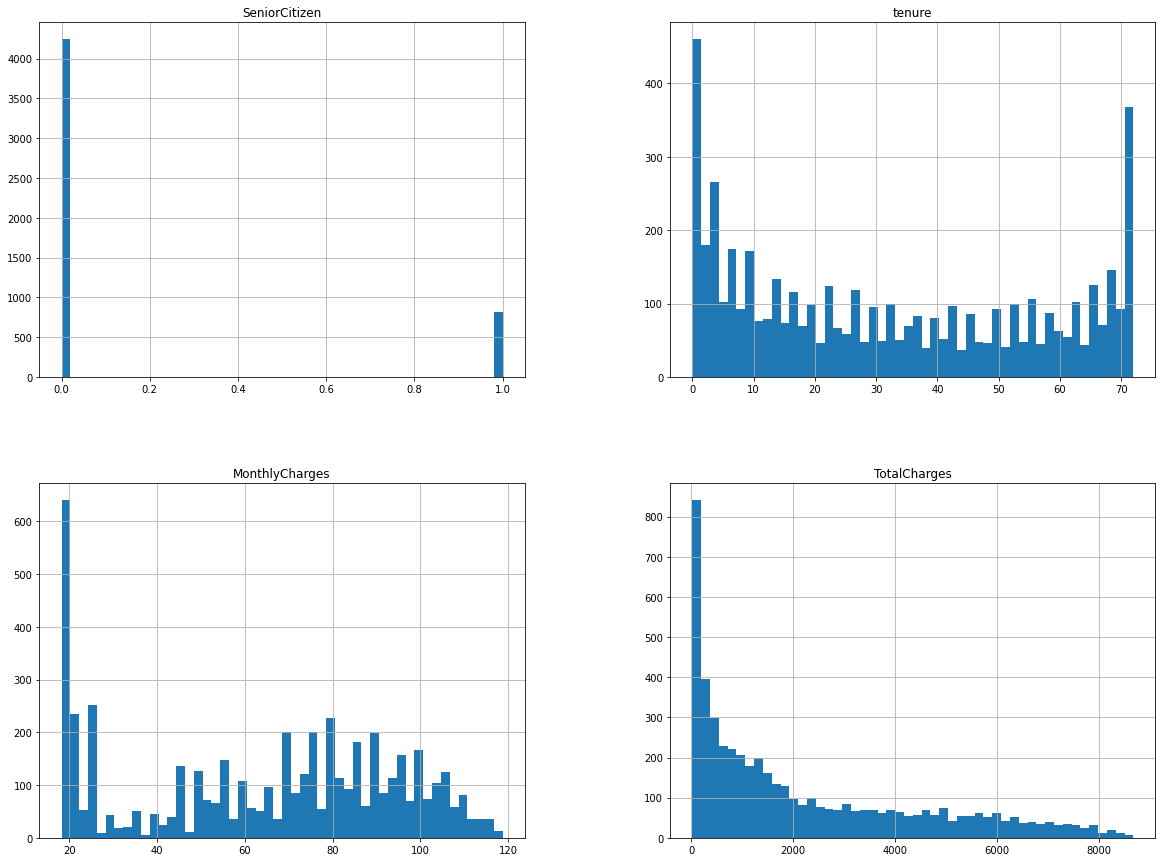

In [23]:
# Mencari tahu distribusi data dan visualisasi

X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
def skew_func (data_new, column):
    skewness = data_new[column].skew(axis = 0, skipna = True)
    print(f'Skewness of {column} = ', skewness)

In [25]:
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()

In [26]:
for column in num_columns:
    skew_func(X_train, column)

Skewness of SeniorCitizen =  1.8336855403047345
Skewness of tenure =  0.2610660172802175
Skewness of MonthlyCharges =  -0.2065082954332818
Skewness of TotalCharges =  0.9872880865651582


In [27]:
def outiers_val(data_new, column):
    skewness = X_train[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        batas_atas = X_train[column].mean() + 3 * X_train[column].std()
        batas_bawah =  X_train[column].mean() - 3 * X_train[column].std()
        print('[Normal]')
        print(f'Batas atas {column} = {batas_atas}')
        print(f'Batas bawah {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(X_train[X_train[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(X_train[X_train[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(X_train[X_train[column] > batas_atas]) / len(X_train) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(X_train[X_train[column] < batas_bawah]) / len(X_train) * 100 ))
        print('-'*100)
    else:
        IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
        batas_bawah = X_train[column].quantile(0.25) - (IQR * 1.5)
        batas_atas = X_train[column].quantile(0.75) + (IQR * 1.5)
        print('[Skewed]')
        print(f'Batas atas dari {column} = {batas_atas}')
        print(f'Batas bawah dari {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(X_train[X_train[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(X_train[X_train[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(X_train[X_train[column] > batas_atas]) / len(X_train) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(X_train[X_train[column] < batas_bawah]) / len(X_train) * 100 ))
        print('-'*100)

In [28]:
num_data_outlier = X_train.select_dtypes(include= np.number).columns.tolist()

In [29]:
for features in num_data_outlier:
    outiers_val(X_train, features)

[Skewed]
Batas atas dari SeniorCitizen = 0.0
Batas bawah dari SeniorCitizen = 0.0
Total data melebihi batas atas : 821
Total data kurang dari batas bawah : 0
% melebihi batas atas : 16.2156824017381
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Normal]
Batas atas tenure = 105.77515608492203
Batas bawah tenure = -41.665339770483946
Total data melebihi batas atas : 0
Total data kurang dari batas bawah : 0
% melebihi batas atas : 0.0
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Normal]
Batas atas MonthlyCharges = 154.54690250267024
Batas bawah MonthlyCharges = -26.070702621176906
Total data melebihi batas atas : 0
Total data kurang dari batas bawah : 0
% melebihi batas atas : 0.0
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Ske

---
## Handling Missing Values

In [30]:
print(X_train.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64


In [31]:
print(X_test.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64


In [32]:
print(X_val.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [33]:
# handling missing value pada kolom numerical
# karena data pada kolom numerical terdistribusi skew, maka proses imputasi nilai pada kolom yang terdapat missing value menggunakan nilai median

miss_num = MeanMedianImputer(imputation_method= 'median',
                              variables= ['TotalCharges'])
miss_num.fit(X_train)
X_train_handled = miss_num.transform(X_train)
X_test = miss_num.transform(X_test)
X_val = miss_num.transform(X_val)

In [34]:
print(X_train_handled.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [35]:
print(X_test.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [36]:
print(X_val.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [37]:
y_train.isnull().sum()

0

In [38]:
y_test.isnull().sum()

0

In [39]:
y_val.isnull().sum()

0

---
## Feature Selection

In [40]:
# Display X_train_handled

X_train_handled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
765,7817-OMJNA,Male,0,No,No,14,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.40,275.70
1365,4238-HFHSN,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.15,4904.85
4389,0228-MAUWC,Male,0,No,No,19,Yes,Yes,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,59.55,1144.60
1032,8146-QQKZH,Female,0,Yes,No,71,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),81.85,5924.40
1100,8824-RWFXJ,Male,0,Yes,Yes,3,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,56.15,168.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,9853-JFZDU,Female,0,Yes,No,35,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,56.85,1861.10
3762,4201-JMNGR,Female,1,No,No,1,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,55.80,55.80
6369,0940-OUQEC,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.70,788.80
2094,0761-AETCS,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.30,19.30


In [41]:
X_test_handled = X_test.copy()
X_test_handled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
82,9919-YLNNG,Female,0,No,No,42,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.80,4327.50
1294,6729-GDNGC,Female,1,No,No,20,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),80.70,1614.20
2570,9153-BTBVV,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1753.00
7004,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75
5461,6538-POCHL,Male,0,No,No,33,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),79.00,2576.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2560-PPCHE,Female,0,No,No,65,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),105.05,6744.25
3595,7925-PNRGI,Female,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,No,Mailed check,81.30,3541.10
3815,6174-NRBTZ,Male,0,No,No,46,No,No phone service,DSL,Yes,No,No,No,No,No,One year,Yes,Bank transfer (automatic),30.75,1489.30
6466,1177-XZBJL,Male,0,Yes,Yes,53,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),64.15,3491.55


In [42]:
X_val_handled = X_val.copy()
X_val_handled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1728,3877-JRJIP,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.85,59.85
1024,4822-RVYBB,Male,1,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,819.40
2322,2774-LVQUS,Female,1,Yes,No,15,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,83.05,1258.30
3531,3612-YUNGG,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.20,6741.15
6753,7471-MQPOS,Male,1,Yes,Yes,71,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.90,5139.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,5846-ABOBJ,Male,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.45,1730.65
713,5575-TPIZQ,Male,0,No,No,46,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.15,4245.55
3136,5077-DXTCG,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.30,45.30
1181,0887-WBJVH,Female,0,Yes,No,53,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,93.45,4872.20


In [43]:
y_train_table = pd.DataFrame(y_train, columns= ['Churn'])
y_train_table

,Churn
765,0
1365,0
4389,0
1032,0
1100,1
...,...
6377,0
3762,1
6369,1
2094,1


In [44]:
# menggabungkan X_train dan y_train_table

data_kor = X_train.copy()
data_kor['Churn'] = y_train_table['Churn']
data_kor.shape

(5063, 21)

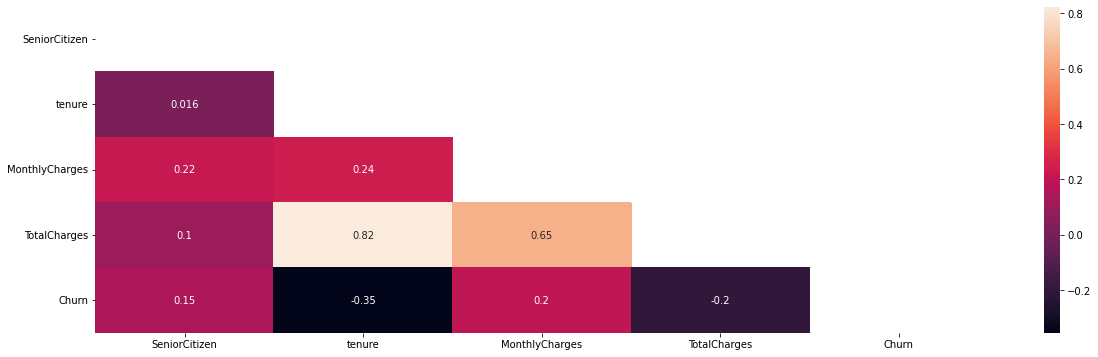

In [45]:
plt.figure(figsize=(20,6))
sns.heatmap(data_kor.corr(),annot=True, mask=np.triu(data_kor.corr()))

In [46]:
num_col = X_train_handled.select_dtypes(include= np.number).columns.tolist()
cat_col = X_train_handled.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', num_col)
print('Kolom bertype catagorical pada dataset :', cat_col)

Kolom bertype numeric pada dataset : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Kolom bertype catagorical pada dataset : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


- The `customerID` column will be dropped, because it has nothing to do with the target column
- Because the model will predict whether the customer continues their subscription or not, the`PhoneService` and `MultipleLines` columns will be dropped, because the data contained in these columns does not really affect the decision to continue the subscription

In [47]:
X_train_handled.drop(['customerID', 'PhoneService', 'MultipleLines'], axis = 1, inplace= True)
X_test_handled.drop(['customerID', 'PhoneService', 'MultipleLines'], axis = 1, inplace= True)
X_val_handled.drop(['customerID', 'PhoneService', 'MultipleLines'], axis = 1, inplace= True)

---
## Split between numerical and categorical columns


In [48]:
X_train_handled

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
765,Male,0,No,No,14,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.40,275.70
1365,Male,1,Yes,No,61,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.15,4904.85
4389,Male,0,No,No,19,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,59.55,1144.60
1032,Female,0,Yes,No,71,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),81.85,5924.40
1100,Male,0,Yes,Yes,3,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,56.15,168.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,Female,0,Yes,No,35,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,56.85,1861.10
3762,Female,1,No,No,1,DSL,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,55.80,55.80
6369,Male,0,No,No,10,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.70,788.80
2094,Female,0,No,No,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.30,19.30


In [49]:
# Get Numerical, binary, and multi class Columns

num_columns = X_train_handled.select_dtypes(include=np.number).columns.tolist()
binary_columns= X_train_handled[['gender', 'Partner', 'Dependents', 'PaperlessBilling']].columns.to_list()
multiclass_columns = X_train_handled[['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                     'Contract', 'PaymentMethod']].columns.to_list()

print('Numerical Columns : ', num_columns)
print('Binary Columns : ', binary_columns)
print('Multi class Columns : ', multiclass_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Binary Columns :  ['gender', 'Partner', 'Dependents', 'PaperlessBilling']
Multi class Columns :  ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [50]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train_handled[num_columns]
X_train_binary = X_train_handled[binary_columns]
X_train_multiclass = X_train_handled[multiclass_columns]

X_test_num = X_test_handled[num_columns]
X_test_binary = X_test_handled[binary_columns]
X_test_multiclass = X_test_handled[multiclass_columns]

X_val_num = X_val_handled[num_columns]
X_val_binary = X_val_handled[binary_columns]
X_val_multiclass = X_val_handled[multiclass_columns]


---
## Feature Scaling

In [51]:
# Display X_train_num

X_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
765,0,14,20.40,275.70
1365,1,61,82.15,4904.85
4389,0,19,59.55,1144.60
1032,0,71,81.85,5924.40
1100,0,3,56.15,168.15
...,...,...,...,...
6377,0,35,56.85,1861.10
3762,1,1,55.80,55.80
6369,0,10,80.70,788.80
2094,0,1,19.30,19.30


In [52]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)

X_train_num_scaled

array([[-0.4399327 , -0.73480592, -1.45641716, -0.87511935],
       [ 2.27307494,  1.17801899,  0.5950805 ,  1.18474633],
       [-0.4399327 , -0.5313139 , -0.15575103, -0.48847876],
       ...,
       [-0.4399327 , -0.89759953,  0.54690768, -0.64680161],
       [-0.4399327 , -1.26388515, -1.49296206, -0.98921148],
       [-0.4399327 , -0.69410751,  1.36584562, -0.30396901]])

---
## Feature Encoding

In [53]:
# Display X_train_binary

X_train_binary

,gender,Partner,Dependents,PaperlessBilling
765,Male,No,No,No
1365,Male,Yes,No,Yes
4389,Male,No,No,No
1032,Female,Yes,No,No
1100,Male,Yes,Yes,Yes
...,...,...,...,...
6377,Female,Yes,No,No
3762,Female,No,No,Yes
6369,Male,No,No,Yes
2094,Female,No,No,No


In [54]:
# Feature Encoding using OrdinalEncoder
# Encoding pada kolom dengan type categorical ordinal

encoder = OrdinalEncoder()

X_train_binary_enc = encoder.fit_transform(X_train_binary)
X_test_binary_enc = encoder.transform(X_test_binary)
X_val_binary_enc = encoder.transform(X_val_binary)
X_train_binary_enc

array([[1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.]])

In [55]:
# Display X_train_multiclass

X_train_multiclass

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
765,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Bank transfer (automatic)
1365,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Electronic check
4389,DSL,No,No,Yes,Yes,No,No,Month-to-month,Electronic check
1032,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Bank transfer (automatic)
1100,DSL,No,Yes,Yes,No,No,No,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...
6377,DSL,No,Yes,No,Yes,No,No,Month-to-month,Electronic check
3762,DSL,Yes,No,Yes,No,No,No,Month-to-month,Electronic check
6369,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Bank transfer (automatic)
2094,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Electronic check


In [56]:
# Feature Encoding using OneHotEncoder
# Encoding pada kolom dengan type categorical nominal

encoder2 = OneHotEncoder(handle_unknown='ignore', sparse= False)

X_train_multiclass_enc = encoder2.fit_transform(X_train_multiclass)
X_test_multiclass_enc = encoder2.transform(X_test_multiclass)
X_val_multiclass_enc = encoder2.transform(X_val_multiclass)
X_train_multiclass_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

---
## Concat between Numerical Columns and Categorical Columns

In [57]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_binary_enc, X_train_multiclass_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_binary_enc, X_test_multiclass_enc], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_binary_enc, X_val_multiclass_enc], axis=1)
X_train_final

array([[-0.4399327 , -0.73480592, -1.45641716, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.27307494,  1.17801899,  0.5950805 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.4399327 , -0.5313139 , -0.15575103, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.4399327 , -0.89759953,  0.54690768, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4399327 , -1.26388515, -1.49296206, ...,  0.        ,
         1.        ,  0.        ],
       [-0.4399327 , -0.69410751,  1.36584562, ...,  0.        ,
         0.        ,  0.        ]])

# Model Definition

## Functional API

In [58]:
X_train_final.shape

(5063, 36)

In [98]:
# Deklarasikan arsitektur 
data_in = Input(shape= (36,))
data_drop = Dropout(0.25)(data_in)
hidden_1 = Dense(18, activation= 'relu')(data_drop)
hidden_2 = Dense(9, activation= 'relu')(hidden_1)
out = Dense(1, activation= 'sigmoid')(hidden_2)

model = Model(inputs= data_in, outputs= out)

# Summarize layers

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 36)]              0         
                                                                 
 dropout_5 (Dropout)         (None, 36)                0         
                                                                 
 dense_10 (Dense)            (None, 18)                666       
                                                                 
 dense_11 (Dense)            (None, 9)                 171       
                                                                 
 dense_12 (Dense)            (None, 1)                 10        
                                                                 
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
# Compile

model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [141]:
# Training

history = model.fit(X_train_final, y_train, epochs= 180, validation_data = (X_val_final, y_val))

Epoch 1/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.7934 - val_loss: 0.4395 - val_accuracy: 0.7780
Epoch 2/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8029 - val_loss: 0.4404 - val_accuracy: 0.7780
Epoch 3/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8037 - val_loss: 0.4369 - val_accuracy: 0.7815
Epoch 4/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7991 - val_loss: 0.4398 - val_accuracy: 0.7762
Epoch 5/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7985 - val_loss: 0.4373 - val_accuracy: 0.7780
Epoch 6/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8007 - val_loss: 0.4420 - val_accuracy: 0.7744
Epoch 7/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8021 - val_loss: 0.4390 - val_accuracy: 0.7798

In [142]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.420211,0.793403,0.439478,0.777975
1,0.412876,0.802884,0.440380,0.777975
2,0.414109,0.803674,0.436866,0.781528
3,0.418895,0.799131,0.439818,0.776199
4,0.417777,0.798538,0.437268,0.777975


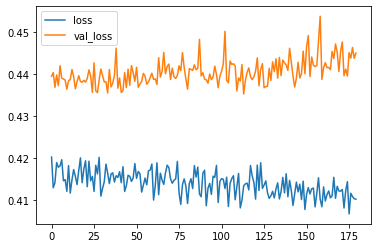

In [143]:
metrics[['loss', 'val_loss']].plot();

In [144]:
# Evaluate model using classification report

y_pred = model.predict(X_test_final)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1041
           1       0.68      0.42      0.52       366

    accuracy                           0.80      1407
   macro avg       0.75      0.67      0.70      1407
weighted avg       0.78      0.80      0.78      1407



## Sequential API

In [65]:
X_train_final.shape

(5063, 36)

In [85]:
# Deklarasikan arsitektur 

model_2 = Sequential()
model_2.add(Dense(18, input_shape= (36,), activation = 'relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(9, activation= 'relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(3, activation= 'relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(1, activation = 'sigmoid'))

# Summarize model_2

print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 18)                666       
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_7 (Dense)             (None, 9)                 171       
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 30        
                                                                 
 dropout_4 (Dropout)         (None, 3)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [145]:
# Compile

model_2.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

# Training

history_2 = model_2.fit(X_train_final, y_train, epochs= 180, validation_data = (X_val_final, y_val))

Epoch 1/180
159/159 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.8090 - val_loss: 0.4554 - val_accuracy: 0.7673
Epoch 2/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7976 - val_loss: 0.4594 - val_accuracy: 0.7655
Epoch 3/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8017 - val_loss: 0.4556 - val_accuracy: 0.7726
Epoch 4/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8027 - val_loss: 0.4550 - val_accuracy: 0.7673
Epoch 5/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7964 - val_loss: 0.4535 - val_accuracy: 0.7744
Epoch 6/180
159/159 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8064 - val_loss: 0.4590 - val_accuracy: 0.7726
Epoch 7/180
159/159 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7981 - val_loss: 0.4576 - val_accuracy: 0.7780

In [146]:
metrics_2 = pd.DataFrame(history_2.history)
metrics_2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.421359,0.809007,0.455404,0.767318
1,0.426436,0.797551,0.459415,0.765542
2,0.427419,0.801699,0.455632,0.772647
3,0.422824,0.802686,0.455036,0.767318
4,0.430147,0.796366,0.453476,0.774423


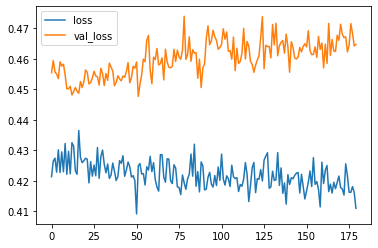

In [147]:
metrics_2[['loss', 'val_loss']].plot();

In [148]:
y_pred_2 = model_2.predict(X_test_final)
y_pred_2 = np.where(y_pred_2 >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.46      0.54       366

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



# Making Pipeline

## Pipeline for preprocessing

In [71]:
print(num_columns)
print(binary_columns)
print(multiclass_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PaperlessBilling']
['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [112]:
num_pipeline = make_pipeline(MeanMedianImputer(imputation_method= 'median',
                              variables= ['TotalCharges']),
                             StandardScaler())

binary_pipeline = make_pipeline(OneHotEncoder())

multiclass_pipeline = make_pipeline(OrdinalEncoder())

preprocessor_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']),
    ('pipe_binary', binary_pipeline, ['gender', 'Partner', 'Dependents', 'PaperlessBilling']),
    ('pipe_multiclass', multiclass_pipeline, ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                              'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])
])

In [113]:
X_train_pipe = X_train.copy()
X_test_pipe = X_test.copy()
X_val_pipe = X_val.copy()

X_train_pipe.drop(['customerID', 'PhoneService', 'MultipleLines'], axis = 1, inplace= True)
X_test_pipe.drop(['customerID', 'PhoneService', 'MultipleLines'], axis = 1, inplace= True)
X_val_pipe.drop(['customerID', 'PhoneService', 'MultipleLines'], axis = 1, inplace= True)

X_train_pipe_done = preprocessor_pipeline.fit_transform(X_train_pipe)
X_test_pipe_done = preprocessor_pipeline.transform(X_test_pipe)
X_val_pipe_done = preprocessor_pipeline.transform(X_val_pipe)

In [127]:
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor_pipeline, f)

## Pipeline for Sequential API

In [116]:
#Train Dataset
X_train_pipe_seq = tf.data.Dataset.from_tensor_slices((X_train_pipe_done, y_train))
X_train_pipe_seq = X_train_pipe_seq.batch(50)

#Test Dataset
X_test_pipe_seq = tf.data.Dataset.from_tensor_slices((X_test_pipe_done, y_test))
X_test_pipe_seq = X_test_pipe_seq.batch(50)

#Validation Dataset
X_val_pipe_seq = tf.data.Dataset.from_tensor_slices((X_val_pipe_done, y_val))
X_val_pipe_seq = X_val_pipe_seq.batch(50)

#Call Model
model_pipe = Sequential()
model_pipe.add(Dense(18, input_shape= (21,), activation = 'relu'))
model_pipe.add(Dropout(0.25))
model_pipe.add(Dense(9, activation= 'relu'))
model_pipe.add(Dropout(0.25))
model_pipe.add(Dense(3, activation= 'relu'))
model_pipe.add(Dropout(0.25))
model_pipe.add(Dense(1, activation = 'sigmoid'))
model_pipe.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

#Fit
history_pipe = model_pipe.fit(X_train_pipe_seq, epochs=180, validation_data=X_val_pipe_seq)

Epoch 1/180
102/102 [==============================] - 3s 6ms/step - loss: 0.7163 - accuracy: 0.6366 - val_loss: 0.6716 - val_accuracy: 0.7353
Epoch 2/180
102/102 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.7219 - val_loss: 0.6532 - val_accuracy: 0.7425
Epoch 3/180
102/102 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.7341 - val_loss: 0.6355 - val_accuracy: 0.7478
Epoch 4/180
102/102 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.7501 - val_loss: 0.6180 - val_accuracy: 0.7513
Epoch 5/180
102/102 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.7488 - val_loss: 0.6031 - val_accuracy: 0.7496
Epoch 6/180
102/102 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.7509 - val_loss: 0.5885 - val_accuracy: 0.7531
Epoch 7/180
102/102 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7571 - val_loss: 0.5744 - val_accuracy: 0.7638

In [125]:
model_pipe.save('churn_model.h5')

# Model Inference

In [128]:
data_inf_clear

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8498-XXGWA,Female,0,Yes,No,65,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.15,3673.15,0
1,2091-RFFBA,Female,1,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.90,2217.15,1
2,7623-TRNQN,Male,0,No,Yes,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.90,49.90,1
3,4565-EVZMJ,Female,0,No,No,47,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,58.90,2813.05,0
4,6693-DJWTY,Female,0,No,Yes,35,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,0
5,4698-KVLLG,Female,1,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.90,0
6,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,0
7,0723-FDLAY,Male,0,No,No,44,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),85.25,3704.15,0
8,8042-RNLKO,Male,0,No,No,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.45,1699.15,0
9,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.35,81.25,1


In [129]:
data_inf_final = preprocessor_pipeline.transform(data_inf_clear)

In [131]:
model_inf = load_model('churn_model.h5')
model_inf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 18)                396       
                                                                 
 dropout_12 (Dropout)        (None, 18)                0         
                                                                 
 dense_22 (Dense)            (None, 9)                 171       
                                                                 
 dropout_13 (Dropout)        (None, 9)                 0         
                                                                 
 dense_23 (Dense)            (None, 3)                 30        
                                                                 
 dropout_14 (Dropout)        (None, 3)                 0         
                                                                 
 dense_24 (Dense)            (None, 1)                

In [132]:
y_pred_inf = model_inf.predict(data_inf_final)

In [133]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn-Prediction'])

In [139]:
data_inf_result= pd.concat([data_inf_clear, y_pred_inf], axis=1)

In [140]:
data_inf_result

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn-Prediction
0,8498-XXGWA,Female,0,Yes,No,65,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,55.15,3673.15,0,0.099166
1,2091-RFFBA,Female,1,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,2217.15,1,0.476627
2,7623-TRNQN,Male,0,No,Yes,1,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,Yes,Mailed check,49.90,49.90,1,0.300191
3,4565-EVZMJ,Female,0,No,No,47,Yes,No,DSL,Yes,...,Yes,No,No,One year,Yes,Mailed check,58.90,2813.05,0,0.099166
4,6693-DJWTY,Female,0,No,Yes,35,Yes,No,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,0,0.099166
5,4698-KVLLG,Female,1,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.90,0,0.099166
6,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,0,0.099166
7,0723-FDLAY,Male,0,No,No,44,Yes,Yes,DSL,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),85.25,3704.15,0,0.099166
8,8042-RNLKO,Male,0,No,No,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.45,1699.15,0,0.099166
9,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,44.35,81.25,1,0.405981


# Pengambilan Kesimpulan

- Dari hasil pemodelan di atas didapatkan hasil dari pemodelan menggunakan funtional API memiliki akurasi sebesar 80% dan dengan menggunakan pemodelan Sequential sebesar 79%
- Pada saat dilakukan pemodelan terdapat grafik yang kurang stabil antara loss dan val_loss, ini mungkin disebabkan karena data yang digunakan imbalanced
- Dari hasil pengujian terhadap data inference, nilai pada kolom prediksi churn mendekati dengan kolom chun sebelumnya